<a href="https://colab.research.google.com/github/DilshodbekMX/GoogleColab/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [769]:
import sklearn

In [770]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [771]:
len(X), len(y)

(1000, 1000)

In [772]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [773]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


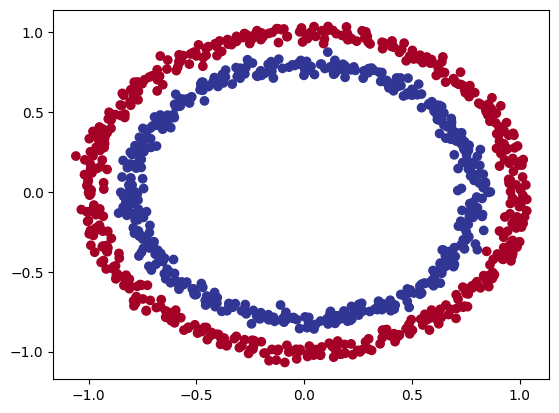

In [774]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [775]:
X.shape, y.shape

((1000, 2), (1000,))

In [776]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [777]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [778]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [779]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [780]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [781]:
X_train, X_train.shape

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        ...,
        [ 0.01574478, -1.02998534],
        [ 1.01102578,  0.16802846],
        [ 0.55778227, -0.57087612]]),
 (800, 2))

In [782]:
class  CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2,out_features=5),
    #     nn.Linear(in_features=5,out_features=1)
    # )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))
    # return self.two_linear_layers(x)


model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [783]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [784]:
model_0 = two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    ).to(device)

In [785]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [786]:
X_test = torch.Tensor(X_test)
X_train = torch.Tensor(X_train)
y_test = torch.Tensor(y_test)
y_train = torch.Tensor(y_train)
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"{len(untrained_preds)}, {untrained_preds.shape})")
print(f"{len(X_test)}, {X_test.shape}")
print(f"{torch.round(untrained_preds[:10].T)}")
print(f"{y_test[:10]}")



200, torch.Size([200, 1]))
200, torch.Size([200, 2])
tensor([[-0., -0., 0., -0., 0., 0., 0., 0., 0., -0.]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [787]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [788]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100

  return acc

In [789]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [790]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [791]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [792]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [793]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
epochs = 100

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train.to(device))

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69451 | Test acc: 58.00%
Epoch 10 | Loss: 0.69657, Acc: 51.88% | Test loss: 0.69356 | Test acc: 57.00%
Epoch 20 | Loss: 0.69550, Acc: 51.00% | Test loss: 0.69289 | Test acc: 55.00%
Epoch 30 | Loss: 0.69473, Acc: 51.88% | Test loss: 0.69249 | Test acc: 52.50%
Epoch 40 | Loss: 0.69421, Acc: 51.12% | Test loss: 0.69231 | Test acc: 49.50%
Epoch 50 | Loss: 0.69386, Acc: 51.25% | Test loss: 0.69229 | Test acc: 51.00%
Epoch 60 | Loss: 0.69363, Acc: 50.12% | Test loss: 0.69237 | Test acc: 51.00%
Epoch 70 | Loss: 0.69347, Acc: 50.38% | Test loss: 0.69251 | Test acc: 50.50%
Epoch 80 | Loss: 0.69334, Acc: 50.38% | Test loss: 0.69269 | Test acc: 50.50%
Epoch 90 | Loss: 0.69325, Acc: 51.00% | Test loss: 0.69289 | Test acc: 50.00%


In [794]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("Exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Exists


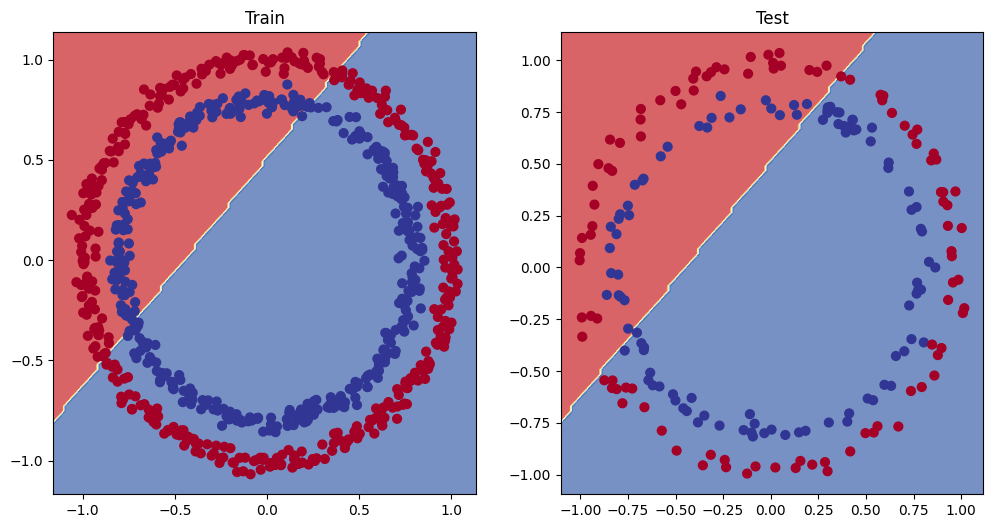

In [795]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_0, X_test, y_test)

In [796]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=32)
    self.layer_2 = nn.Linear(in_features=32, out_features=64)
    self.layer_3 = nn.Linear(in_features=64, out_features=32)
    self.layer_4 = nn.Linear(in_features=32, out_features=1)

    self.relu = nn.ReLU()

  def forward(self, x):
    self.ml_1 = self.relu(self.layer_1(x))
    self.ml_2 = self.relu(self.layer_2(self.ml_1))
    self.ml_3 = self.relu(self.layer_3(self.ml_2))
    return self.layer_4(self.ml_3)

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [797]:
loss_fn_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.Adam(params=model_1.parameters(),lr=0.001)

In [798]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn_1(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer_1.zero_grad()

  loss.backward()
  optimizer_1.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_1(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

  if epoch == epochs-1:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

Epoch 0 | Loss: 0.69310, Acc: 50.0000% | Test loss: 0.69197 | Test acc: 50.0000%
Epoch 10 | Loss: 0.68895, Acc: 55.3750% | Test loss: 0.68869 | Test acc: 54.5000%
Epoch 20 | Loss: 0.68424, Acc: 60.2500% | Test loss: 0.68450 | Test acc: 59.0000%
Epoch 30 | Loss: 0.67539, Acc: 66.1250% | Test loss: 0.67674 | Test acc: 64.0000%
Epoch 40 | Loss: 0.65925, Acc: 75.7500% | Test loss: 0.66157 | Test acc: 77.5000%
Epoch 50 | Loss: 0.63017, Acc: 84.8750% | Test loss: 0.63228 | Test acc: 84.5000%
Epoch 60 | Loss: 0.58094, Acc: 93.0000% | Test loss: 0.58335 | Test acc: 92.5000%
Epoch 70 | Loss: 0.50883, Acc: 98.3750% | Test loss: 0.51312 | Test acc: 98.0000%
Epoch 80 | Loss: 0.41547, Acc: 99.8750% | Test loss: 0.42401 | Test acc: 99.0000%
Epoch 90 | Loss: 0.31097, Acc: 99.8750% | Test loss: 0.32443 | Test acc: 99.5000%
Epoch 99 | Loss: 0.22213, Acc: 100.0000% | Test loss: 0.24020 | Test acc: 100.0000%


In [799]:
model_1.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

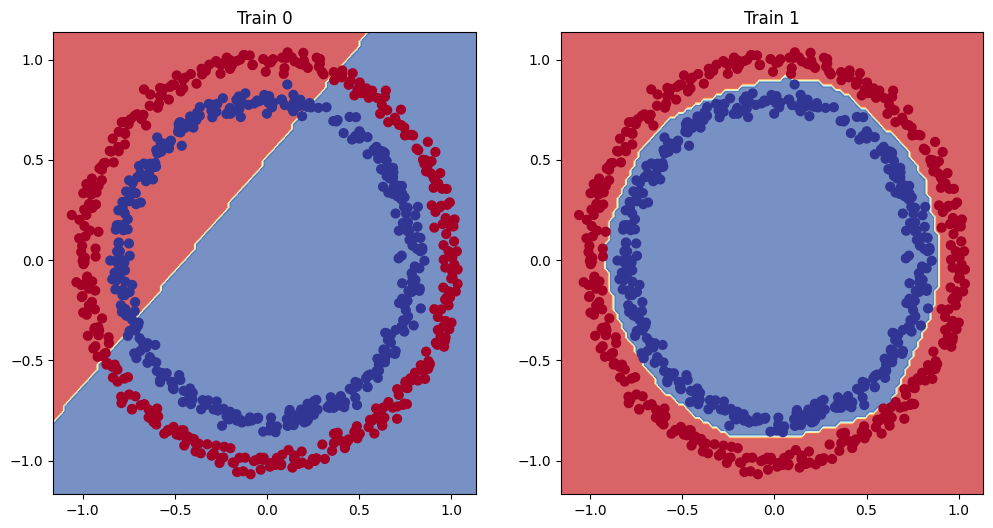

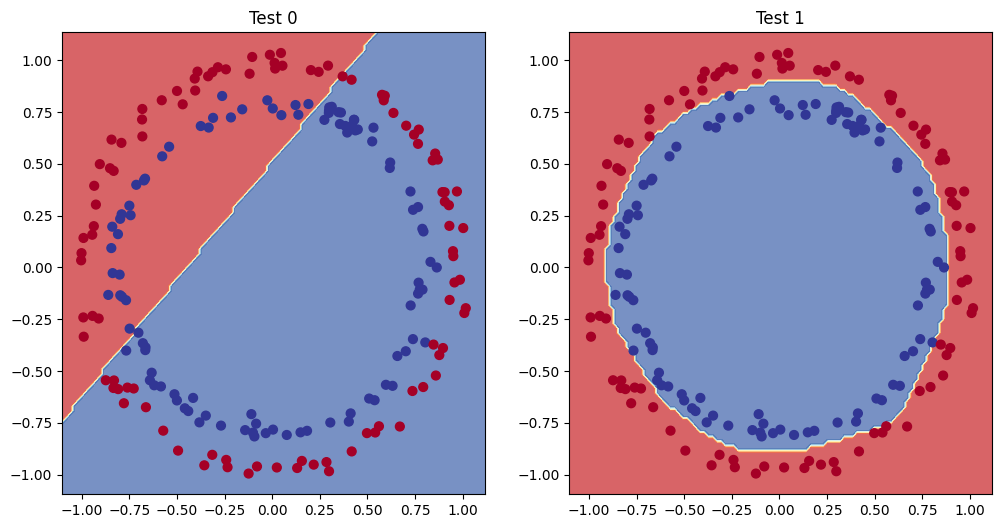

In [800]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train 0")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Train 1")
plot_decision_boundary(model_1, X_train, y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test 0")
plot_decision_boundary(model_0, X_test, y_test)

plt.subplot(1,2,2)
plt.title("Test 1")
plot_decision_boundary(model_1, X_test, y_test)

# Multi Class Classification|

In [801]:
from sklearn.datasets import make_blobs

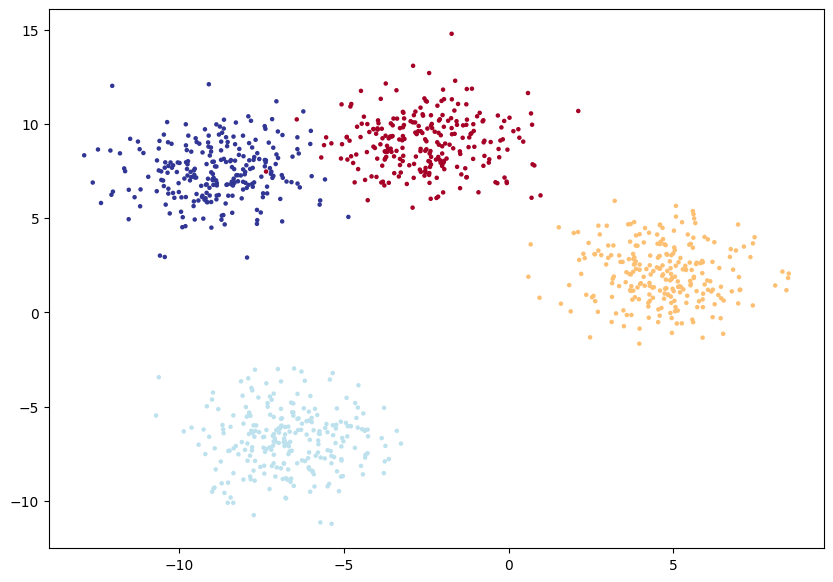

In [802]:
NUM_CLASSES = 4
NUM_FFEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FFEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu,s=5)

In [803]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
         nn.Linear(in_features=input_features, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=output_features))
  def forward(self, x):
    return self.linear_layer_stack(x)

multi_model = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

multi_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [804]:
loss_multi = nn.CrossEntropyLoss()
optimizer_multi = torch.optim.Adam(params=multi_model.parameters(), lr=0.01)

In [805]:
multi_model.eval()
with torch.inference_mode():
  y_logits=multi_model(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [806]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [807]:
y_pred_probs=torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0'),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0'))

In [808]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [809]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [810]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)
epochs = 200

for epoch in range(epochs):
  multi_model.train()

  y_logits = multi_model(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_multi(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer_multi.zero_grad()

  loss.backward()
  optimizer_multi.step()

  multi_model.eval()
  with torch.inference_mode():
    test_logits = multi_model(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss = loss_multi(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

  if epoch == epochs-1:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

Epoch 0 | Loss: 1.15883, Acc: 40.38% | Test loss: 1.09778 | Test acc: 46.50%
Epoch 10 | Loss: 0.66860, Acc: 80.88% | Test loss: 0.68123 | Test acc: 93.00%
Epoch 20 | Loss: 0.38183, Acc: 98.00% | Test loss: 0.36981 | Test acc: 99.00%
Epoch 30 | Loss: 0.12265, Acc: 98.88% | Test loss: 0.10953 | Test acc: 99.50%
Epoch 40 | Loss: 0.04622, Acc: 99.25% | Test loss: 0.03843 | Test acc: 99.50%
Epoch 50 | Loss: 0.03069, Acc: 99.25% | Test loss: 0.02161 | Test acc: 99.50%
Epoch 60 | Loss: 0.02691, Acc: 99.25% | Test loss: 0.01760 | Test acc: 99.50%
Epoch 70 | Loss: 0.02535, Acc: 99.25% | Test loss: 0.01534 | Test acc: 99.50%
Epoch 80 | Loss: 0.02456, Acc: 99.12% | Test loss: 0.01451 | Test acc: 99.50%
Epoch 90 | Loss: 0.02404, Acc: 99.38% | Test loss: 0.01350 | Test acc: 99.50%
Epoch 100 | Loss: 0.02365, Acc: 99.38% | Test loss: 0.01305 | Test acc: 99.50%
Epoch 110 | Loss: 0.02332, Acc: 99.38% | Test loss: 0.01257 | Test acc: 99.50%
Epoch 120 | Loss: 0.02304, Acc: 99.38% | Test loss: 0.01216 | T

In [811]:
multi_model.eval()
with torch.inference_mode():
  y_preds = torch.softmax(multi_model(X_blob_test),dim=1).argmax(dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

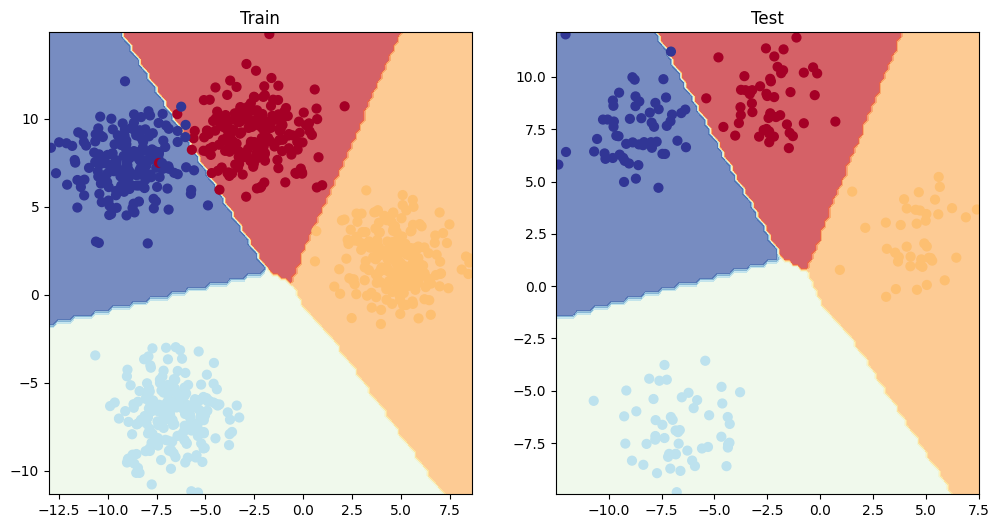

In [812]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(multi_model, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multi_model, X_blob_test, y_blob_test)

In [813]:
!pip install torchmetrics

In [814]:
from torchmetrics import Accuracy

t_metric = Accuracy(task='multiclass',
                                     num_classes=NUM_CLASSES).to(device)
t_metric(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

#**Exercise**

In [815]:
from sklearn.datasets import make_moons

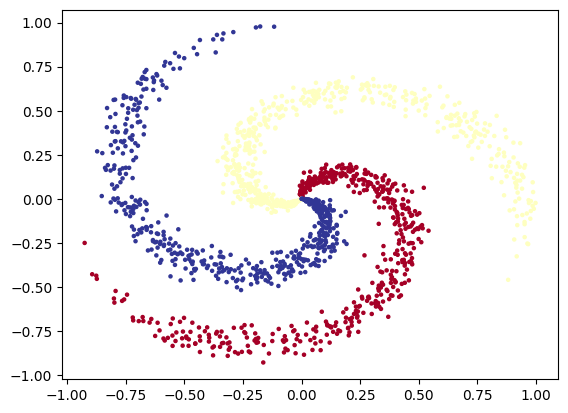

In [816]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=plt.cm.RdYlBu)
plt.show()

In [817]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

In [818]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [819]:
X_moon_train[:5]

tensor([[ 0.3699, -0.6703],
        [-0.0745, -0.0156],
        [-0.5394,  0.8277],
        [ 0.0776, -0.2106],
        [ 0.4405, -0.4770]])

In [820]:
y_moon_train[:5]

tensor([0, 1, 2, 2, 0])

In [821]:
class MoonModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=32):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
         nn.Linear(in_features=input_features, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=output_features))
  def forward(self, x):
    return self.linear_layer_stack(x)

multi_model_2 = MoonModel(input_features=2, output_features=3, hidden_units=32).to(device)

multi_model_2

MoonModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [822]:
X_moon_train = X_moon_train.to(device)
X_moon_test = X_moon_test.to(device)
y_moon_train = y_moon_train.to(device)
y_moon_test = y_moon_test.to(device)

In [823]:
loss_multi_2 = nn.CrossEntropyLoss()
optimizer_multi_2 = torch.optim.Adam(params=multi_model_2.parameters(), lr=0.01)

In [824]:
multi_model_2.eval()
with torch.inference_mode():
  y_logits=multi_model_2(X_moon_test.to(device))
y_logits[:10]

tensor([[-0.1163,  0.0767,  0.0034],
        [-0.0860,  0.0973,  0.0073],
        [-0.1354,  0.0657, -0.0168],
        [-0.1249,  0.0630, -0.0096],
        [-0.1145,  0.0618, -0.0017],
        [-0.0953,  0.1171,  0.0640],
        [-0.1260,  0.0732,  0.0148],
        [-0.1066,  0.0966,  0.0328],
        [-0.1145,  0.0652, -0.0015],
        [-0.1365,  0.0765,  0.0007]], device='cuda:0')

In [825]:
y_moon_test[:10]

tensor([2, 2, 0, 0, 0, 1, 2, 1, 2, 0], device='cuda:0')

In [826]:
y_pred_probs=torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[-0.1163,  0.0767,  0.0034],
         [-0.0860,  0.0973,  0.0073],
         [-0.1354,  0.0657, -0.0168],
         [-0.1249,  0.0630, -0.0096],
         [-0.1145,  0.0618, -0.0017]], device='cuda:0'),
 tensor([[0.2994, 0.3631, 0.3375],
         [0.3031, 0.3641, 0.3328],
         [0.2986, 0.3651, 0.3362],
         [0.3004, 0.3625, 0.3371],
         [0.3019, 0.3601, 0.3380]], device='cuda:0'))

In [827]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [828]:
y_moon_test

tensor([2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0,
        1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1,
        1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0,
        0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2,
        1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0,
        1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2,
        1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1,
        2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0,
        2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1,
        2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2,
        0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2,

In [829]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_moon_train = X_moon_train.to(device)
X_moon_test = X_moon_test.to(device)
y_moon_train = y_moon_train.to(device)
y_moon_test = y_moon_test.to(device)
epochs = 1000

for epoch in range(epochs):
  multi_model_2.train()

  y_logits = multi_model_2(X_moon_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_multi_2(y_logits, y_moon_train)

  acc = accuracy_fn(y_true=y_moon_train, y_pred=y_pred)

  optimizer_multi_2.zero_grad()

  loss.backward()
  optimizer_multi_2.step()

  multi_model_2.eval()
  with torch.inference_mode():
    test_logits = multi_model_2(X_moon_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss = loss_multi_2(test_logits, y_moon_test)
    test_acc = accuracy_fn(y_true=y_moon_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

  if epoch == epochs-1:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

Epoch 0 | Loss: 1.10554, Acc: 34.50% | Test loss: 1.08673 | Test acc: 28.67%
Epoch 10 | Loss: 0.85654, Acc: 63.92% | Test loss: 0.85317 | Test acc: 60.00%
Epoch 20 | Loss: 0.65551, Acc: 58.33% | Test loss: 0.68511 | Test acc: 58.67%
Epoch 30 | Loss: 0.53537, Acc: 67.00% | Test loss: 0.56811 | Test acc: 65.67%
Epoch 40 | Loss: 0.41443, Acc: 79.50% | Test loss: 0.43215 | Test acc: 79.33%
Epoch 50 | Loss: 0.30296, Acc: 88.00% | Test loss: 0.30731 | Test acc: 89.33%
Epoch 60 | Loss: 0.21353, Acc: 92.58% | Test loss: 0.20784 | Test acc: 92.67%
Epoch 70 | Loss: 0.15128, Acc: 95.42% | Test loss: 0.14027 | Test acc: 97.00%
Epoch 80 | Loss: 0.11240, Acc: 98.00% | Test loss: 0.09985 | Test acc: 99.33%
Epoch 90 | Loss: 0.08788, Acc: 99.08% | Test loss: 0.07417 | Test acc: 99.67%
Epoch 100 | Loss: 0.07111, Acc: 99.58% | Test loss: 0.05723 | Test acc: 99.67%
Epoch 110 | Loss: 0.05993, Acc: 99.67% | Test loss: 0.04719 | Test acc: 99.67%
Epoch 120 | Loss: 0.05186, Acc: 99.67% | Test loss: 0.03998 | T

In [830]:
multi_model_2.eval()
with torch.inference_mode():
  y_preds = torch.softmax(multi_model_2(X_moon_test),dim=1).argmax(dim=1)
y_preds[:10], y_moon_test[:10]

(tensor([2, 2, 0, 0, 0, 1, 2, 1, 2, 0], device='cuda:0'),
 tensor([2, 2, 0, 0, 0, 1, 2, 1, 2, 0], device='cuda:0'))

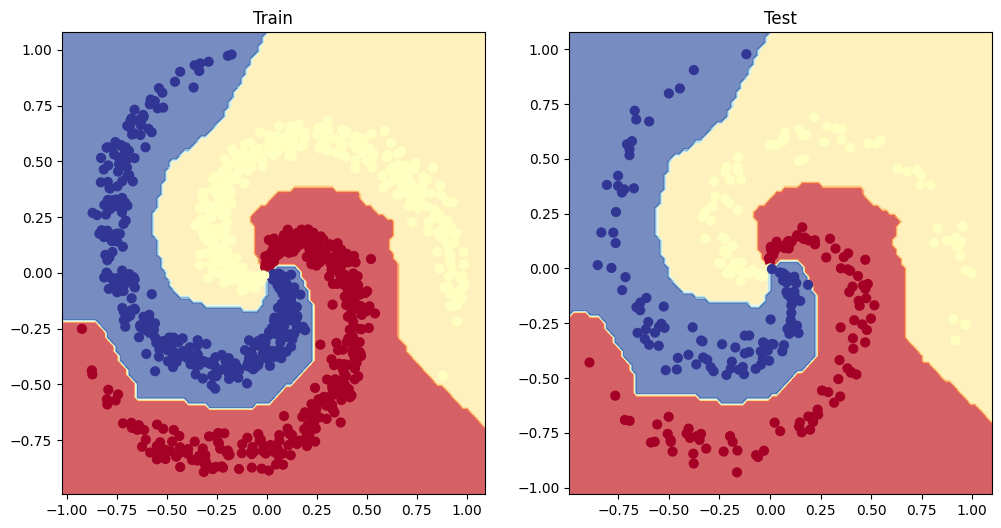

In [831]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(multi_model_2, X_moon_train, y_moon_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multi_model_2, X_moon_test, y_moon_test)